<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = '/Users/stephanienduaguba/Documents/DATA/winequality_merged.csv'

data = pd.read_csv(wine_csv)

In [3]:
# Number of rows and columns
data.shape

(6497, 13)

In [4]:
# First 5 rows of data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
# Last 5 rows of data
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [6]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
# High-level stat summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [8]:
# Check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

#### 1.2 Explore Data (Exploratory Data Analysis)

In [9]:
# Drop categorical variable 'red_wine'
data.drop(columns=['red_wine'], inplace=True)

In [10]:
# Confirm data excludes 'red_wine'
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
# Correlation matrix
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


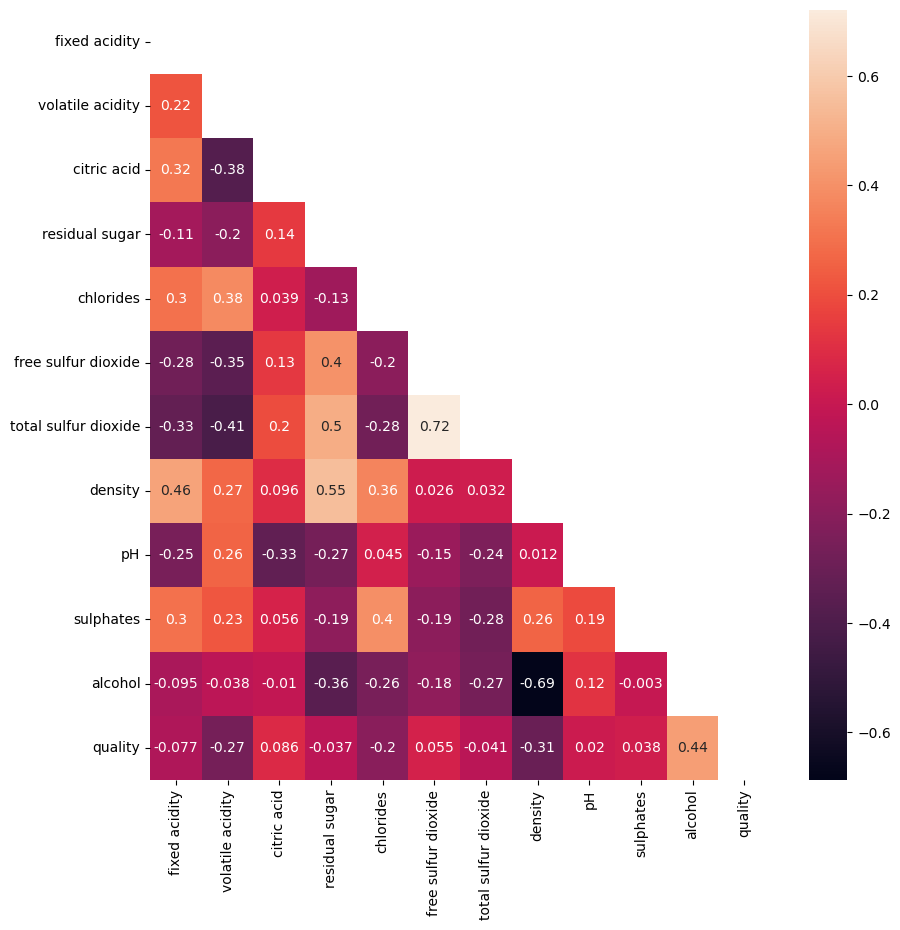

In [12]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,10))
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, mask=mask)
plt.show()

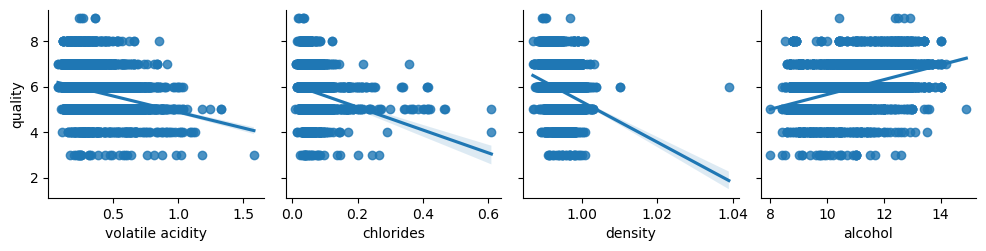

In [13]:
# Pairplot of numerical variables more than positive or negative 0.2 correlation with quality
sns.pairplot(data, y_vars='quality', x_vars=[
    #'fixed acidity', 
    'volatile acidity', 
    #'citric acid', 'residual sugar',
       'chlorides', 
    #'free sulfur dioxide', 'total sulfur dioxide', 
    'density',
    #'pH', 'sulphates', 
    'alcohol'], kind='reg');

### 2. Set Target Variable

Create a target variable for wine quality.

In [19]:
# Target variable
y = data['quality']

In [20]:
# Number of rows and columns of y
y.shape

(6497,)

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [21]:
# Column headers
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

ANSWER:

Predictor variables selection process and reasoning - Initial selection is based on correlation with quality greater than 0.2 or less than -0.2.

'alcohol' - shows a positive correlation of 0.44 with wine quality. This feature has the highest correlation to wine quality.

'density' - shows a negative correlation of -0.31 with wine quality. However, it's important to note that it's highly correlated with alcohol (at -0.69), indicating a potential issue with multicollinearity.

'volatile acidity' - shows a negative correlation of -0.27 with wine quality.

'chlorides' - shows a negative correlation of -0.2 with wine quality.

In general, the independent variables have a weak correlation with wine quality. For modeling purposes, 'alcohol', 'density', 'volatile acidity', and 'chlorides' will be initially considered. As the performance of the model is assessed, other correlated numerical variables may be introduced.

In [22]:
# Predictor variables
X = data[[#'fixed acidity', 
          'volatile acidity', 
    #'citric acid', 'residual sugar',
       'chlorides', 
    #'free sulfur dioxide', 'total sulfur dioxide', 
    'density', 
    #'pH', 'sulphates', 
    'alcohol']]

In [23]:
# Number of rows and columns of X
X.shape

(6497, 4)

### 4. Using Linear Regression Create a Model and Test Score

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
X_train

,volatile acidity,chlorides,density,alcohol
1916,0.240,0.031,0.99380,10.5
947,0.280,0.093,0.99408,12.4
877,0.715,0.064,0.99371,11.8
2927,0.370,0.028,0.99020,11.7
6063,0.260,0.053,0.99810,9.3
...,...,...,...,...
3772,0.320,0.050,0.99990,9.2
5191,0.280,0.043,0.99202,10.7
5226,0.370,0.117,0.99459,9.5
5390,0.260,0.051,0.99536,9.5


In [27]:
y_train

1916    5
947     7
877     6
2927    6
6063    5
       ..
3772    5
5191    7
5226    5
5390    5
860     5
Name: quality, Length: 5197, dtype: int64

In [28]:
X_test

,volatile acidity,chlorides,density,alcohol
3103,0.170,0.045,0.99420,12.2
1419,0.640,0.077,0.99560,9.9
4761,0.390,0.020,0.99212,12.0
4690,0.280,0.040,0.99592,9.5
4032,0.350,0.054,0.99888,8.9
...,...,...,...,...
889,0.900,0.112,1.00289,9.3
2850,0.245,0.049,0.99270,9.3
4917,0.160,0.042,0.98962,12.4
5198,0.390,0.053,0.99787,9.4


In [29]:
y_test

3103    8
1419    5
4761    7
4690    6
4032    6
       ..
889     5
2850    5
4917    7
5198    6
5643    7
Name: quality, Length: 1300, dtype: int64

In [30]:
# Create a model for Linear Regression
# Fit the model with the Training data
LR = LinearRegression().fit(X_train, y_train)

print(LR.coef_, LR.intercept_)

[-1.51250401 -0.08243747 40.83297487  0.39187742] -38.39531946161812


In [31]:
# Calculate the score (R^2 for Regression) for Training Data
LR.score(X_train, y_train)

0.2707886547599644

In [32]:
# Create a model for Linear Regression
# Fit the model with the Test data
LR = LinearRegression().fit(X_test, y_test)

print(LR.coef_, LR.intercept_)

[-1.34604838 -0.8317639  26.8396831   0.33916017] -23.915952519937004


In [33]:
# Calculate the score (R^2 for Regression) for Testing Data
LR.score(X_test, y_test)

0.25598024511089545

#### Testing out other models - SVM and RandomForestClassifier

In [34]:
# Import necessary libraries 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [35]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5161538461538462

In [41]:
rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6361538461538462

## Cross validation

In [51]:
# Cross validation libraries
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [52]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
model = LinearRegression()
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    # Fit model with training set
    model.fit(X_train, y_train)

    # Make predictions with training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(r2_score(y_train, y_train_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_scores.append(r2_score(y_test, y_test_pred))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Train R2': train_scores,
    'Train RMSE': train_rmse,
    'Test R2': test_scores,
    'Test RMSE': test_rmse
})

In [54]:
metrics_df

,Fold,Train R2,Train RMSE,Test R2,Test RMSE
0,1,0.272033,0.747082,0.247653,0.748918
1,2,0.265489,0.745347,0.273025,0.755981
2,3,0.259440,0.749278,0.297429,0.740102
3,4,0.275562,0.744056,0.229720,0.761392
4,5,0.264882,0.750765,0.277209,0.733915


In [53]:
# Describe the metrics
print(metrics_df.describe())

           Fold  Train R2  Train RMSE   Test R2  Test RMSE
count  5.000000  5.000000    5.000000  5.000000   5.000000
mean   3.000000  0.267481    0.747305  0.265007   0.748062
std    1.581139  0.006352    0.002752  0.026508   0.011232
min    1.000000  0.259440    0.744056  0.229720   0.733915
25%    2.000000  0.264882    0.745347  0.247653   0.740102
50%    3.000000  0.265489    0.747082  0.273025   0.748918
75%    4.000000  0.272033    0.749278  0.277209   0.755981
max    5.000000  0.275562    0.750765  0.297429   0.761392


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

Mean R^2 for the test data = 0.265007

There were four features selected - volatile acidity, chlorides, density and alcohol

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



